# Pre-processing of Members data

Some pre-processing and basic feature engineering for Members data, followed by an Autoencoder test.

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dirty feat-eng

In [5]:
members = pd.read_csv(filepath_or_buffer='data/users.csv')
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [6]:
# create an additional category for unknown gender
members['gender'].fillna('it', inplace=True)

In [7]:
# move lowest pop. cat. to most similar cat.
members.loc[(members['registered_via']==16) | (members['registered_via']==13), 'registered_via'] = 9

In [8]:
# creates age slices an push odd values to unknown age
members.loc[(members['bd']<=0) | (members['bd']>80),'bd'] = 0
members.loc[(members['bd']<=15) & (members['bd']>0),'bd'] = 1
members.loc[(members['bd']<=20) & (members['bd']>15),'bd'] = 2
members.loc[(members['bd']<=25) & (members['bd']>20),'bd'] = 3
members.loc[(members['bd']<=30) & (members['bd']>25),'bd'] = 4
members.loc[(members['bd']<=35) & (members['bd']>30),'bd'] = 5
members.loc[(members['bd']<=40) & (members['bd']>35),'bd'] = 6
members.loc[(members['bd']<=45) & (members['bd']>40),'bd'] = 7
members.loc[(members['bd']<=50) & (members['bd']>45),'bd'] = 8
members.loc[(members['bd']<=60) & (members['bd']>50),'bd'] = 9
members.loc[members['bd']>60,'bd'] = 10

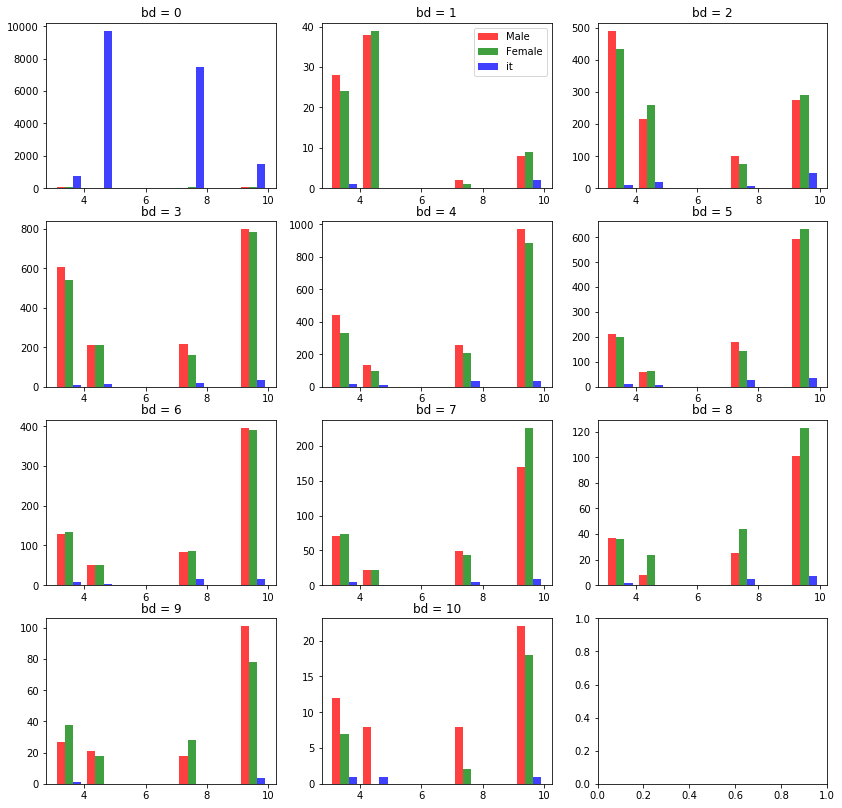

In [9]:
f, axarr = plt.subplots(4, 3,figsize=(14, 14))
binBoundaries = np.linspace(3,10,8)

var1_a = members.loc[(members['bd']==0) & (members['gender']=='male'), 'registered_via']
var1_b = members.loc[(members['bd']==0) & (members['gender']=='female'), 'registered_via']
var1_c = members.loc[(members['bd']==0) & (members['gender']=='it'), 'registered_via']
var2_a = members.loc[(members['bd']==1) & (members['gender']=='male'), 'registered_via']
var2_b = members.loc[(members['bd']==1) & (members['gender']=='female'), 'registered_via']
var2_c = members.loc[(members['bd']==1) & (members['gender']=='it'), 'registered_via']
var3_a = members.loc[(members['bd']==2) & (members['gender']=='male'), 'registered_via']
var3_b = members.loc[(members['bd']==2) & (members['gender']=='female'), 'registered_via']
var3_c = members.loc[(members['bd']==2) & (members['gender']=='it'), 'registered_via']
var4_a = members.loc[(members['bd']==3) & (members['gender']=='male'), 'registered_via']
var4_b = members.loc[(members['bd']==3) & (members['gender']=='female'), 'registered_via']
var4_c = members.loc[(members['bd']==3) & (members['gender']=='it'), 'registered_via']
var5_a = members.loc[(members['bd']==4) & (members['gender']=='male'), 'registered_via']
var5_b = members.loc[(members['bd']==4) & (members['gender']=='female'), 'registered_via']
var5_c = members.loc[(members['bd']==4) & (members['gender']=='it'), 'registered_via']
var6_a = members.loc[(members['bd']==5) & (members['gender']=='male'), 'registered_via']
var6_b = members.loc[(members['bd']==5) & (members['gender']=='female'), 'registered_via']
var6_c = members.loc[(members['bd']==5) & (members['gender']=='it'), 'registered_via']
var7_a = members.loc[(members['bd']==6) & (members['gender']=='male'), 'registered_via']
var7_b = members.loc[(members['bd']==6) & (members['gender']=='female'), 'registered_via']
var7_c = members.loc[(members['bd']==6) & (members['gender']=='it'), 'registered_via']
var8_a = members.loc[(members['bd']==7) & (members['gender']=='male'), 'registered_via']
var8_b = members.loc[(members['bd']==7) & (members['gender']=='female'), 'registered_via']
var8_c = members.loc[(members['bd']==7) & (members['gender']=='it'), 'registered_via']
var9_a = members.loc[(members['bd']==8) & (members['gender']=='male'), 'registered_via']
var9_b = members.loc[(members['bd']==8) & (members['gender']=='female'), 'registered_via']
var9_c = members.loc[(members['bd']==8) & (members['gender']=='it'), 'registered_via']
var10_a = members.loc[(members['bd']==9) & (members['gender']=='male'), 'registered_via']
var10_b = members.loc[(members['bd']==9) & (members['gender']=='female'), 'registered_via']
var10_c = members.loc[(members['bd']==9) & (members['gender']=='it'), 'registered_via']
var11_a = members.loc[(members['bd']==10) & (members['gender']=='male'), 'registered_via']
var11_b = members.loc[(members['bd']==10) & (members['gender']=='female'), 'registered_via']
var11_c = members.loc[(members['bd']==10) & (members['gender']=='it'), 'registered_via']

axarr[0,0].hist([var1_a,var1_b,var1_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[0,0].set_title('bd = 0')
axarr[0,1].hist([var2_a,var2_b,var2_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[0,1].set_title('bd = 1')
axarr[0,1].legend(['Male','Female', 'it'],loc=0,prop={'size': 10})
axarr[0,2].hist([var3_a,var3_b,var3_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[0,2].set_title('bd = 2')
axarr[1,0].hist([var4_a,var4_b,var4_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[1,0].set_title('bd = 3')
axarr[1,1].hist([var5_a,var5_b,var5_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[1,1].set_title('bd = 4')
axarr[1,2].hist([var6_a,var6_b,var6_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[1,2].set_title('bd = 5')
axarr[2,0].hist([var7_a,var7_b,var7_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[2,0].set_title('bd = 6')
axarr[2,1].hist([var8_a,var8_b,var8_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[2,1].set_title('bd = 7')
axarr[2,2].hist([var9_a,var9_b,var9_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[2,2].set_title('bd = 8')
axarr[3,0].hist([var10_a,var10_b,var10_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[3,0].set_title('bd = 9')
axarr[3,1].hist([var11_a,var11_b,var11_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[3,1].set_title('bd = 10')

In [10]:
# guess age with above considerations
members.loc[(members['bd']==0) & (members['registered_via']==3),'bd'] = 2
members.loc[(members['bd']==0) & (members['registered_via']==4),'bd'] = 1
members.loc[(members['bd']==0) & (members['registered_via']==7),'bd'] = 5
members.loc[(members['bd']==0) & (members['registered_via']==9),'bd'] = 4

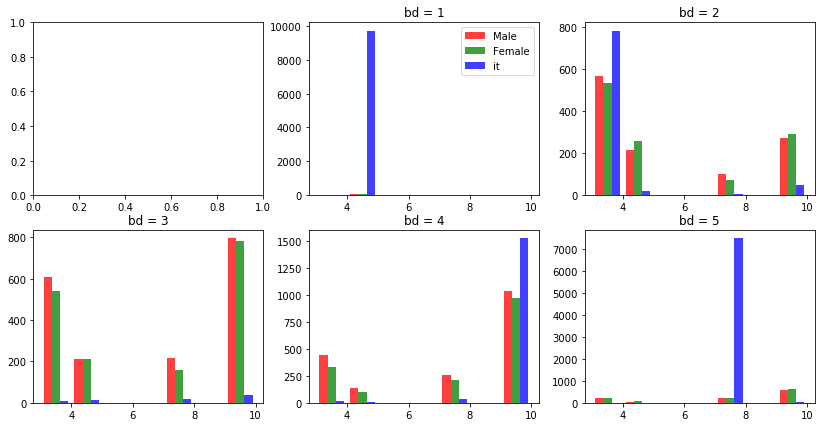

In [11]:
f, axarr = plt.subplots(2, 3,figsize=(14, 7))
binBoundaries = np.linspace(3,10,8)

var2_a = members.loc[(members['bd']==1) & (members['gender']=='male'), 'registered_via']
var2_b = members.loc[(members['bd']==1) & (members['gender']=='female'), 'registered_via']
var2_c = members.loc[(members['bd']==1) & (members['gender']=='it'), 'registered_via']
var3_a = members.loc[(members['bd']==2) & (members['gender']=='male'), 'registered_via']
var3_b = members.loc[(members['bd']==2) & (members['gender']=='female'), 'registered_via']
var3_c = members.loc[(members['bd']==2) & (members['gender']=='it'), 'registered_via']
var4_a = members.loc[(members['bd']==3) & (members['gender']=='male'), 'registered_via']
var4_b = members.loc[(members['bd']==3) & (members['gender']=='female'), 'registered_via']
var4_c = members.loc[(members['bd']==3) & (members['gender']=='it'), 'registered_via']
var5_a = members.loc[(members['bd']==4) & (members['gender']=='male'), 'registered_via']
var5_b = members.loc[(members['bd']==4) & (members['gender']=='female'), 'registered_via']
var5_c = members.loc[(members['bd']==4) & (members['gender']=='it'), 'registered_via']
var6_a = members.loc[(members['bd']==5) & (members['gender']=='male'), 'registered_via']
var6_b = members.loc[(members['bd']==5) & (members['gender']=='female'), 'registered_via']
var6_c = members.loc[(members['bd']==5) & (members['gender']=='it'), 'registered_via']

axarr[0,1].hist([var2_a,var2_b,var2_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[0,1].set_title('bd = 1')
axarr[0,1].legend(['Male','Female', 'it'],loc=0,prop={'size': 10})
axarr[0,2].hist([var3_a,var3_b,var3_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[0,2].set_title('bd = 2')
axarr[1,0].hist([var4_a,var4_b,var4_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[1,0].set_title('bd = 3')
axarr[1,1].hist([var5_a,var5_b,var5_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[1,1].set_title('bd = 4')
axarr[1,2].hist([var6_a,var6_b,var6_c], bins=binBoundaries, log=False, color=['r','g','b'], alpha=0.75);
axarr[1,2].set_title('bd = 5')

In [12]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,5,it,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,5,it,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,1,it,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,4,it,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,1,it,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,7,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,1,it,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,5,it,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,5,it,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,5,it,7,20160217,20170613


In [29]:
timeinit = pd.to_datetime(members['registration_init_time'], format='%Y%m%d')
timelast = pd.to_datetime(members['expiration_date'], format='%Y%m%d')
timediff = timelast - timeinit

In [43]:
timediff = timediff.dt.days
timediff.head(10)

0    2223
1     725
2     457
3       1
4     138
5    1921
6       3
7     609
8    2454
9     482
dtype: int64

In [44]:
timediff.max()

5149

In [45]:
timediff = timediff / timediff.max()
timediff.head(10)

0    0.431734
1    0.140804
2    0.088755
3    0.000194
4    0.026801
5    0.373082
6    0.000583
7    0.118275
8    0.476597
9    0.093610
dtype: float64

## Reformat data for ML

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time

from sklearn.preprocessing import LabelEncoder

import kklib.preproc as prep
import kklib.utils as utils

In [29]:
# Load the pre-proc'd song dataset
members = utils.dataload(filename='data/members_prep.csv')
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 8 columns):
Unnamed: 0                34403 non-null int64
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    34403 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(6), object(2)
memory usage: 2.1+ MB


### Label Encoding

In [4]:
# Encode all categorical features
le = LabelEncoder()
members['city'] = le.fit_transform(members['city'])
members['bd'] = le.fit_transform(members['bd'])
members['gender'] = le.fit_transform(members['gender'])
members['registered_via'] = le.fit_transform(members['registered_via'])

In [25]:
# covnerts encoded features to shorter int representation
members['city'] = members['city'].astype(np.uint8)
members['bd'] = members['bd'].astype(np.uint8)
members['gender'] = members['gender'].astype(np.uint8)
members['registered_via'] = members['registered_via'].astype(np.uint8)

In [26]:
# converts pd.Series to 1D arrays and delete dataframe (save memory)
city = members['city'].as_matrix()
age = members['bd'].as_matrix()
gender = members['gender'].as_matrix()
registration = members['registered_via'].as_matrix()
temp_msno = members['msno']

### Binarization

In [7]:
# Encode labels as binary encoded vectors
def int2bin(label, maxlabel):
    feature = np.zeros(shape=maxlabel, dtype='uint8')
    counter = 0
    
    if label == 0:
        return feature
    
    while label:
        if label & 1 == 1: # mask of overlapping bits between the two numbers
            feature[counter] = 1
            counter += 1
        else:
            feature[counter] = 0
            counter += 1
        label = int(label/2)
        
    return feature

In [8]:
# find the necessary array sizes depending on max possible value for a given feature
def sizefinder(maxval):
    counter = 0

    while maxval:
        if maxval & 1 == 1: # mask of overlapping bits between the two numbers
            counter += 1
        else:
            counter += 1
        maxval = int(maxval/2)
        
    return counter

In [7]:
# dict of array sizes for binary encoding (depends on feat.engineering reduction!)
maxlabels = {'city': sizefinder(max(city)),
            'age': sizefinder(max(age)),
            'gender': sizefinder(max(gender)),
            'registration': sizefinder(max(registration)) }

num_feat = 0
for name in maxlabels.keys():
    num_feat += maxlabels[name]

print("Tot num. of features: %s" % num_feat)    
print("max: %s %s %s %s" % (sizefinder(max(city)),
                            sizefinder(max(age)),
                            sizefinder(max(gender)),
                            sizefinder(max(registration))) )

Tot num. of features: 13
max: 5 4 2 2


### Batch generation

In [8]:
# Creates a batch from pre-processed data
def getdata(maxlabels, step, batchsize, numdata):
    index = step*batchsize
    
    # adapt size of the last batch
    if (index + batchsize) > numdata:
        batchsize = numdata - index
    
    batch_city = np.zeros(shape=[batchsize,maxlabels['city']], dtype='uint8')
    batch_age = np.zeros(shape=[batchsize,maxlabels['age']], dtype='uint8')
    batch_gender = np.zeros(shape=[batchsize,maxlabels['gender']], dtype='uint8')
    batch_registration = np.zeros(shape=[batchsize,maxlabels['registration']], dtype='uint8')
    
    for i in range(0,batchsize):
        batch_city[i,:] = int2bin(city[index+i], maxlabels['city'])
        batch_age[i,:] = int2bin(age[index+i], maxlabels['age'])
        batch_gender[i,:] = int2bin(gender[index+i], maxlabels['gender'])
        batch_registration[i,:] = int2bin(registration[index+i], maxlabels['registration'])
   
    # put back all the features together into a single data matrix
    datamembers = np.concatenate([batch_city,
                                batch_age,
                                batch_gender,
                                batch_registration],                               
                               axis=1)
    
    return datamembers

### Save binarized data

In [9]:
num_data = len(city)

temp_city = np.zeros(shape=[num_data,maxlabels['city']], dtype='uint8')
temp_age = np.zeros(shape=[num_data,maxlabels['age']], dtype='uint8')
temp_gender = np.zeros(shape=[num_data,maxlabels['gender']], dtype='uint8')
temp_registration = np.zeros(shape=[num_data,maxlabels['registration']], dtype='uint8')

for i in range(0,num_data):
    temp_city[i,:] = int2bin(city[i], maxlabels['city'])
    temp_age[i,:] = int2bin(age[i], maxlabels['age'])
    temp_gender[i,:] = int2bin(gender[i], maxlabels['gender'])
    temp_registration[i,:] = int2bin(registration[i], maxlabels['registration'])

# put back all the features together into a single data matrix
databinariy = np.concatenate([temp_city,
                              temp_age,
                              temp_gender,
                              temp_registration],
                             axis=1)

# save csv file
np.savetxt('data/binary_members.csv', databinariy, delimiter=',', fmt='%1d')
temp_msno.to_csv(path='data/msno.csv')

del temp_city, temp_age, temp_gender, temp_registration, temp_msno, databinariy

## Autoencoder

In [10]:
# Data parameters
num_data = len(city)

# Training Parameters
learning_rate = tf.placeholder(tf.float32, shape=[])
decay_rate = 0.95
batchsize = 1
epochs = 1
steps = int(num_data/batchsize) + 1
display_step = 10000

# NN Parameters
num_hidden_1 = 20 # hidden layer num features

# Variables declaration
X = tf.placeholder('float', [None, num_feat]) # placeholder to store labels/predictions
weights_1 = tf.Variable(tf.random_normal([num_feat, num_hidden_1],mean=0,stddev=0.5))

# Variables Initializer
init = tf.global_variables_initializer()

In [11]:
# Encoder definition
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.matmul(x, weights_1))
    return layer_1

# Decoder definition
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.matmul(x, tf.transpose(weights_1)))
    return layer_1

In [14]:
# Predictions and labels definition
with tf.name_scope('Model'):
    predictions = decoder(encoder(X))
    preds = tf.round(predictions) # round to integers the predictions
    
with tf.name_scope('Target'):
    labels = X

# Define accuracy and objective
with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.reduce_max(tf.abs(labels - predictions), keep_dims=True, axis=1))
    
with tf.name_scope('Accuracy'):
    results = tf.reduce_sum(tf.cast(tf.equal(labels,preds), tf.int32), keep_dims=True, axis=1)
    accuracy = tf.reduce_sum(tf.cast(tf.equal(results,num_feat), tf.int32), axis=0) / tf.size(results)

# Define optimization
with tf.name_scope('SGD'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [15]:
# Create a Saver to save NN weights
saver = tf.train.Saver([weights_1])

# add variables to be saved to a summary
tf.summary.scalar('loss', loss)
merged = tf.summary.merge_all()

In [17]:
# Total timer
start_time_tot = time.time()

# Start Training in a new TF session
with tf.Session() as sess:
    sess.run(init) # initialize variables
    train_writer = tf.summary.FileWriter('train/', sess.graph)
    
    # Misc. var.
    start_time_part = start_time_tot
    lossvec = np.zeros(shape=[display_step], dtype='float')
    prevloss = 1
    lr_val = 0.1 # intial learning rate
    
    for j in range(0,epochs):
        for i in range(0,steps):
            # Get a batch from dataset
            batch_x = getdata(maxlabels, i, batchsize, num_data)

            # Run optimization op (backprop) and cost op (to get loss value)
            _, l, summary = sess.run([optimizer, loss, merged], feed_dict={X: batch_x, learning_rate: lr_val})
            lossvec[i%display_step] = l
            train_writer.add_summary(summary, i*(j+1))

            # Display result every "display_step" steps
            if i == 0:
                print('Loss at epoch %i - step %i: %f' % (j,i,l))
                print('Learning rate: %0.4f' % lr_val)
                
            elif i % display_step == 0:
                l = lossvec.sum()/display_step
                print('Loss at epoch %i - step %i: %f (runtime = %0.2f sec.)' % (j,i,l,time.time() - start_time_part))
                start_time_part = time.time()
                
                # Adjust learning if loss progress by less than 5%
                if (l/prevloss) > 0.95:
                    lr_val = lr_val*decay_rate
                    print('Learning rate: %0.4f' % lr_val)
                prevloss = l
                
            elif i == steps-1:
                l = lossvec.sum()/display_step
                print('Loss at epoch %i - step %i: %f (runtime = %0.2f sec.)' % (j,i,l,time.time() - start_time_part))
                
    # Compute total accuracy and total loss
    batch_x = getdata(maxlabels, 0, num_data, num_data)
    acc = accuracy.eval({X: batch_x})
    print()
    print('Total accuracy: %0.3f %%' % (100*acc))
    
    # Save the NN weights
    saver.save(sess, 'Users_AE_weights', global_step=i)
    
print("--- %0.2f seconds ---" % (time.time() - start_time_tot))

# End session to avoid any (more) memory problems
sess.close()

Loss at epoch 0 - step 0: 0.699972
Learning rate: 0.1000
Loss at epoch 0 - step 10000: 0.218541 (runtime = 5.27 sec.)
Loss at epoch 0 - step 20000: 0.103654 (runtime = 5.26 sec.)
Loss at epoch 0 - step 30000: 0.077295 (runtime = 5.22 sec.)
Loss at epoch 0 - step 34403: nan (runtime = 2.28 sec.)

Total accuracy: 99.465 %
--- 19.39 seconds ---
